In [12]:
# Import required libraries
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Download stopwords
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Load Fake and Real News datasets
df_fake = pd.read_csv('/content/drive/MyDrive/Sem 3/Concept and technologies of AI/week10/Fake.csv')
df_real = pd.read_csv('/content/drive/MyDrive/Sem 3/Concept and technologies of AI/week10/True.csv')

# Add labels
df_fake['label'] = 0  # Fake
df_real['label'] = 1  # Real

# Combine datasets
df = pd.concat([df_fake, df_real], ignore_index=True)

# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check sample
df.head()


,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [14]:
# Use 'text' column for classification
df['text'] = df['text'].astype(str)  # ensure all entries are strings
X = df['text']
y = df['label']


In [4]:
# Initialize stemmer and stopwords
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # lowercase
    text = re.sub('[^a-zA-Z]', ' ', text)  # remove punctuation/numbers
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stop_words]  # remove stopwords + stem
    return ' '.join(words)

# Apply preprocessing
X = X.apply(preprocess_text)


In [5]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f'Training samples: {len(X_train)}, Testing samples: {len(X_test)}')


Training samples: 35918, Testing samples: 8980


In [6]:
# Convert text to numerical features
vectorizer = CountVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(f'Number of features: {len(vectorizer.get_feature_names_out())}')


Number of features: 5000


In [7]:
# Initialize and train Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)


MultinomialNB()

In [8]:
# Predict on test set
y_pred = nb_model.predict(X_test_vec)
y_prob = nb_model.predict_proba(X_test_vec)[:, 1]  # probabilities for ROC-AUC


In [9]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Precision, Recall, F1-score
print(classification_report(y_test, y_pred))


Accuracy: 0.9420935412026726
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      4710
           1       0.93      0.94      0.94      4270

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980



Confusion Matrix:
 [[4425  285]
 [ 235 4035]]


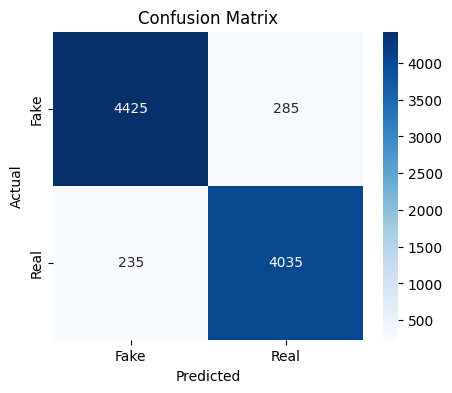

In [10]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

# Optional: visualize confusion matrix
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


ROC-AUC Score: 0.9724064350601888


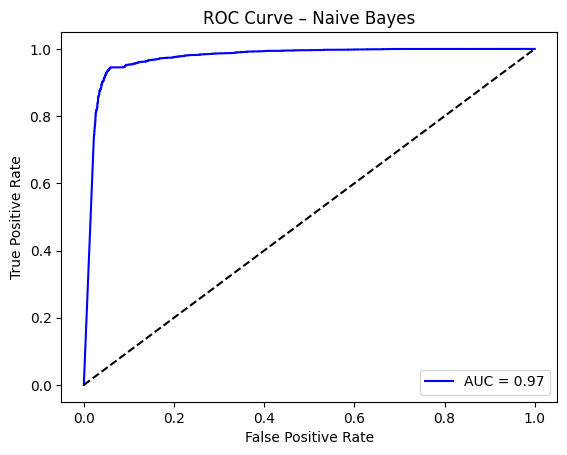

In [11]:
# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print('ROC-AUC Score:', roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0,1],[0,1],'k--')  # random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Naive Bayes')
plt.legend()
plt.show()


In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd


In [16]:
# Load dataset from sklearn
bc_data = load_breast_cancer()

# Create DataFrame
X = pd.DataFrame(bc_data.data, columns=bc_data.feature_names)
y = pd.Series(bc_data.target)  # 0 = malignant, 1 = benign

# Check sample
X.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
# Basic statistics
print(X.describe())

# Check for missing values
print(X.isnull().sum())  # sklearn dataset has no missing values


       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [18]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
log_reg = LogisticRegression(max_iter=1000)
rfe = RFE(log_reg, n_features_to_select=5)
rfe.fit(X_train_scaled, y_train)

# Selected features
selected_features = X.columns[rfe.support_]
print('Top 5 Selected Features:', selected_features)

# Feature ranking
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')
feature_ranking


Top 5 Selected Features: Index(['radius error', 'worst radius', 'worst texture', 'worst area',
       'worst concave points'],
      dtype='object')


,Feature,Ranking
10,radius error,1
20,worst radius,1
23,worst area,1
21,worst texture,1
27,worst concave points,1
7,mean concave points,2
22,worst perimeter,3
13,area error,4
26,worst concavity,5
15,compactness error,6


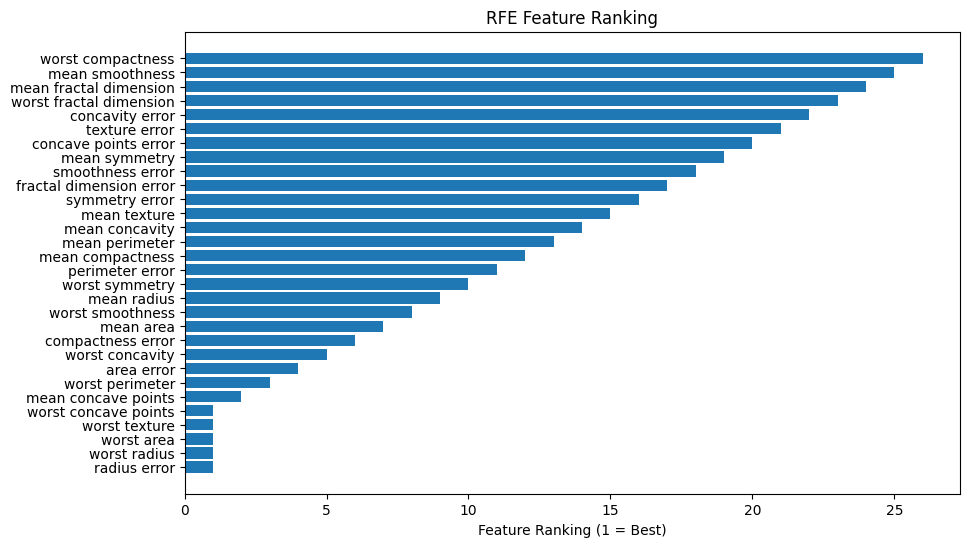

In [20]:
plt.figure(figsize=(10,6))
plt.barh(feature_ranking['Feature'], feature_ranking['Ranking'])
plt.xlabel('Feature Ranking (1 = Best)')
plt.title('RFE Feature Ranking')
plt.show()


In [21]:
X_train_sel = X_train_scaled[:, rfe.support_]
X_test_sel = X_test_scaled[:, rfe.support_]

log_reg.fit(X_train_sel, y_train)
y_pred_sel = log_reg.predict(X_test_sel)
y_prob_sel = log_reg.predict_proba(X_test_sel)[:, 1]

# Evaluation
print('Accuracy (Top 5 Features):', accuracy_score(y_test, y_pred_sel))
print(classification_report(y_test, y_pred_sel))
print('ROC-AUC (Top 5 Features):', roc_auc_score(y_test, y_prob_sel))


Accuracy (Top 5 Features): 0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC (Top 5 Features): 0.9977071732721914


In [22]:
log_reg.fit(X_train_scaled, y_train)
y_pred_all = log_reg.predict(X_test_scaled)
y_prob_all = log_reg.predict_proba(X_test_scaled)[:, 1]

print('Accuracy (All Features):', accuracy_score(y_test, y_pred_all))
print('ROC-AUC (All Features):', roc_auc_score(y_test, y_prob_all))


Accuracy (All Features): 0.9736842105263158
ROC-AUC (All Features): 0.99737962659679


In [23]:
for n in [3, 7]:
    rfe_exp = RFE(log_reg, n_features_to_select=n)
    rfe_exp.fit(X_train_scaled, y_train)
    X_train_exp = X_train_scaled[:, rfe_exp.support_]
    X_test_exp = X_test_scaled[:, rfe_exp.support_]

    log_reg.fit(X_train_exp, y_train)
    y_pred_exp = log_reg.predict(X_test_exp)
    y_prob_exp = log_reg.predict_proba(X_test_exp)[:, 1]

    print(f"\nTop {n} Features")
    print('Accuracy:', accuracy_score(y_test, y_pred_exp))
    print('ROC-AUC:', roc_auc_score(y_test, y_prob_exp))



Top 3 Features
Accuracy: 0.9649122807017544
ROC-AUC: 0.9970520799213889

Top 7 Features
Accuracy: 0.9736842105263158
ROC-AUC: 0.9983622666229938


### Discussion

- Feature selection reduces dimensionality and removes redundant features.
- Models trained with fewer but relevant features often generalize better.
- Too few features can reduce performance due to loss of information.
- Comparing models with all features vs selected features highlights the most predictive variables.
- Optimal feature count depends on dataset complexity and evaluation metrics.
